In [1]:
import pandas as pd
import numpy as np
import os
import io 
import requests
import math
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import zscore
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import svds
import seaborn as sns
import random
import implicit
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from math import sqrt
from sklearn import preprocessing
from sklearn.preprocessing import scale
%matplotlib inline

import time
import datetime
import random

import numpy as np
import six
from tabulate import tabulate

from surprise import AlgoBase
from surprise import Dataset
from surprise import Reader
from surprise import evaluate
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise import accuracy
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise.model_selection import GridSearchCV
from surprise.model_selection import train_test_split
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import PredictionImpossible
from surprise import dump
from surprise.accuracy import rmse

# Load Data

In [2]:
df=pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
len(df)

541909

# Explore Data

In [3]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [4]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df['InvoiceDate'].describe()

count                  541909
unique                  23260
top       2011-10-31 14:41:00
freq                     1114
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

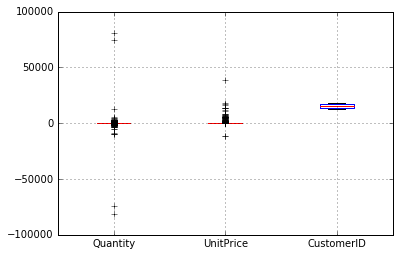

In [7]:
df.boxplot()

In [8]:
df = df[df['UnitPrice'] > 0.00]
df.describe()

,Quantity,UnitPrice,CustomerID
count,539392.000000,539392.000000,406789.000000
mean,9.845904,4.673648,15287.795830
std,215.412652,94.614722,1713.573064
min,-80995.000000,0.001000,12346.000000
25%,1.000000,1.250000,13954.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df.nlargest(10,'Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,16308.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom


In [10]:
df.nsmallest(10,'Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom
160143,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,2011-04-18 13:08:00,2.55,15749.0,United Kingdom
224419,C556522,22920,HERB MARKER BASIL,-1515,2011-06-13 11:21:00,0.55,16938.0,United Kingdom
187609,C552995,M,Manual,-1350,2011-05-12 15:19:00,0.16,18133.0,United Kingdom
160142,C550456,47566B,TEA TIME PARTY BUNTING,-1300,2011-04-18 13:08:00,2.55,15749.0,United Kingdom
390544,C570556,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1296,2011-10-11 11:10:00,1.06,16029.0,United Kingdom


In [11]:
df=df[~df['Quantity'].isin([74215,80995])]
df.describe()

,Quantity,UnitPrice,CustomerID
count,539390.000000,539390.000000,406787.000000
mean,9.558190,4.673659,15287.800215
std,155.031604,94.614898,1713.570107
min,-80995.000000,0.001000,12346.000000
25%,1.000000,1.250000,13954.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,4800.000000,38970.000000,18287.000000


In [12]:
df = df[df['Quantity'] > 0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,530102.000000,530102.000000,397882.000000
mean,10.249284,3.907634,15294.427969
std,37.793548,35.915749,1713.138517
min,1.000000,0.001000,12347.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,4800.000000,13541.330000,18287.000000


In [13]:
df = df.loc[pd.isnull(df.CustomerID) == False]
df.describe()

,Quantity,UnitPrice,CustomerID
count,397882.000000,397882.000000,397882.000000
mean,12.598213,3.116496,15294.427969
std,42.886003,22.097932,1713.138517
min,1.000000,0.001000,12347.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,4800.000000,8142.750000,18287.000000


In [14]:
df['Sales']=df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
df['Sales'].sum()

8665754.704003213

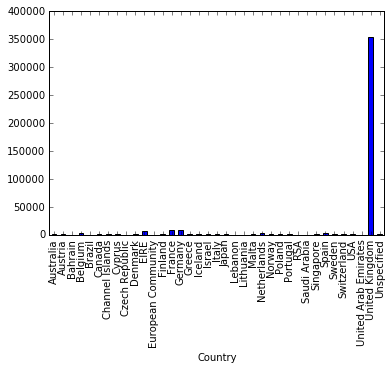

In [20]:
country_group = df.groupby('Country')
country_group.size().plot.bar()

In [17]:
df[['Quantity', 'StockCode']].groupby('Quantity').count().describe()

,StockCode
count,299.000000
mean,1330.709030
std,7406.005133
min,1.000000
25%,1.000000
50%,3.000000
75%,17.000000
max,73301.000000


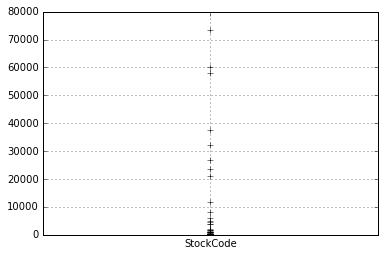

In [18]:
df[['Quantity', 'StockCode']].groupby('Quantity').count().boxplot()

In [19]:
quantbydate=df[['Quantity','InvoiceDate']].groupby('Quantity')
quantbydate.head()

,Quantity,InvoiceDate
0,6,2010-12-01 08:26:00
1,6,2010-12-01 08:26:00
2,8,2010-12-01 08:26:00
3,6,2010-12-01 08:26:00
4,6,2010-12-01 08:26:00
5,2,2010-12-01 08:26:00
6,6,2010-12-01 08:26:00
9,32,2010-12-01 08:34:00
12,8,2010-12-01 08:34:00
15,3,2010-12-01 08:34:00


In [21]:
minquantbd= quantbydate.min()
maxquantbd= quantbydate.max()
duration = maxquantbd - minquantbd
duration.head()

,InvoiceDate
Quantity,
1,373 days 02:39:00
2,373 days 03:54:00
3,373 days 04:16:00
4,373 days 04:16:00
5,373 days 01:10:00


In [22]:
df["dayOfWeek"] = df['InvoiceDate'].dt.dayofweek 
df["hourOfDay"] = df['InvoiceDate'].dt.hour 
df["weekOfYear"] = df['InvoiceDate'].dt.weekofyear 
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,dayOfWeek,hourOfDay,weekOfYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,8,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,8,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,8,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,8,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,8,48
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2,8,48
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2,8,48
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2,8,48
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2,8,48
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2,8,48


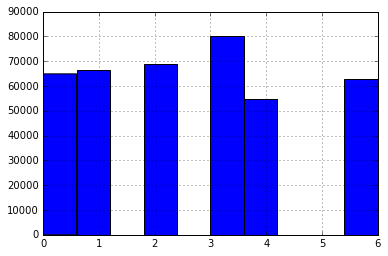

In [23]:
df['dayOfWeek'].hist()

In [24]:
df['dayOfWeek'].value_counts() #We can see the days of activity
# We also see that there is only 6 days of operation insteady of 7

3    80035
2    68885
1    66472
0    64893
6    62773
4    54824
Name: dayOfWeek, dtype: int64

In [25]:
purch_by_day = df['dayOfWeek'].groupby(df['dayOfWeek']).count().to_frame("df")
purch_by_day.index=["Day 1","Day 2","Day 3","Day 4","Day 5","Day 6"]
purch_by_day.head(10)

,df
Day 1,64893
Day 2,66472
Day 3,68885
Day 4,80035
Day 5,54824
Day 6,62773


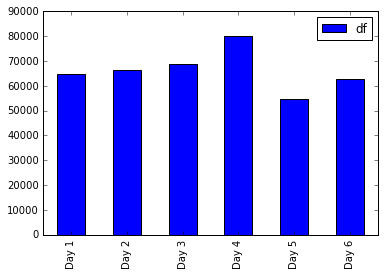

In [26]:
purch_by_day.plot(kind='bar')

In [27]:
duration.describe()

,InvoiceDate
count,299
mean,165 days 12:58:49.966555
std,161 days 11:25:11.772782
min,0 days 00:00:00
25%,0 days 00:00:00
50%,126 days 23:56:00
75%,355 days 19:53:00
max,373 days 04:24:00


In [28]:
df['CustomerID']=df['CustomerID'].astype(object)

In [29]:
customeract=df[['CustomerID','StockCode','Quantity']].groupby(['CustomerID','StockCode','Quantity'])
customeract.head()

,CustomerID,StockCode,Quantity
0,17850,85123A,6
1,17850,71053,6
2,17850,84406B,8
3,17850,84029G,6
4,17850,84029E,6
5,17850,22752,2
6,17850,21730,6
7,17850,22633,6
8,17850,22632,6
9,13047,84879,32


In [30]:
sales_totals = country_group.sum()
sales_totals

,Quantity,UnitPrice,Sales,dayOfWeek,hourOfDay,weekOfYear
Country,,,,,,
Australia,83901,3.612500e+03,1.385213e+05,2779,13471,28525
Austria,4881,1.693900e+03,1.019868e+04,708,4844,12470
Bahrain,260,7.895000e+01,5.484000e+02,12,237,327
Belgium,23237,7.372850e+03,4.119634e+04,5425,24831,61126
Brazil,356,1.426000e+02,1.143600e+03,128,320,480
Canada,2763,9.105800e+02,3.666380e+03,21,1490,3907
Channel Islands,9491,3.389650e+03,2.045044e+04,1823,8224,20343
Cyprus,6361,3.506180e+03,1.359038e+04,1420,7383,18037
Czech Republic,671,7.827000e+01,8.267400e+02,40,220,535


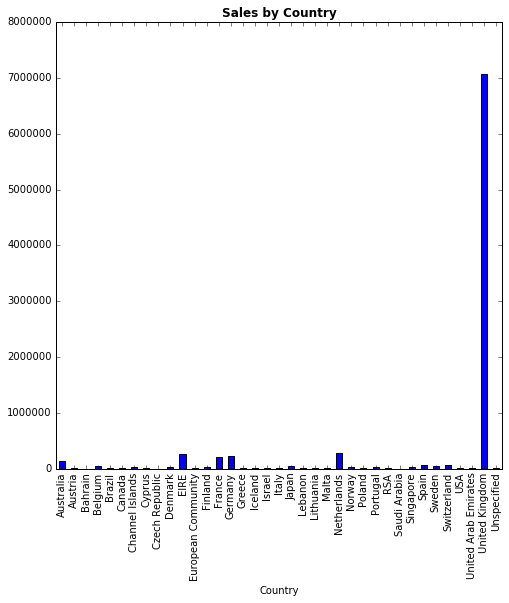

In [31]:
sales_totals['Sales'].plot(x="Country", subplots=True, kind="bar", figsize=(8,8))
plt.title('Sales by Country', weight='bold', size=12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B1A3860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000220E96D8>]], dtype=object)

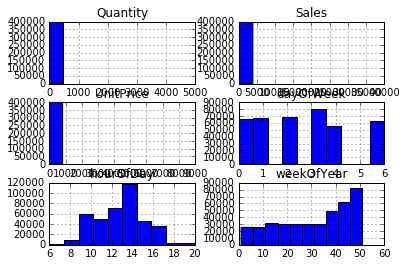

In [32]:
df.hist()

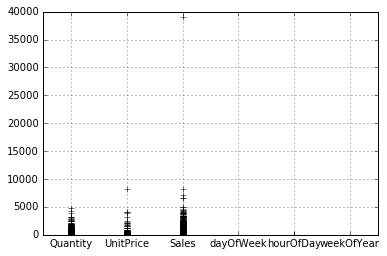

In [33]:
df.boxplot()

In [34]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Sales                 float64
dayOfWeek               int64
hourOfDay               int64
weekOfYear              int64
dtype: object

In [35]:
df.count()

InvoiceNo      397882
StockCode      397882
Description    397882
Quantity       397882
InvoiceDate    397882
UnitPrice      397882
CustomerID     397882
Country        397882
Sales          397882
dayOfWeek      397882
hourOfDay      397882
weekOfYear     397882
dtype: int64

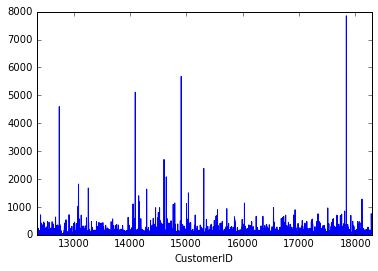

In [36]:
df['InvoiceNo'].groupby(df['CustomerID']).size().plot()

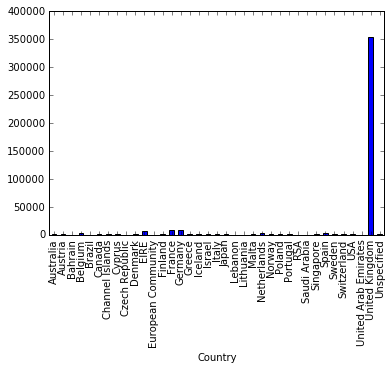

In [37]:
df.InvoiceNo.groupby(df['Country']).size().plot.bar()

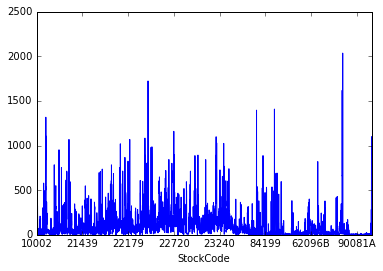

In [38]:
df.InvoiceNo.groupby(df['StockCode']).size().plot()

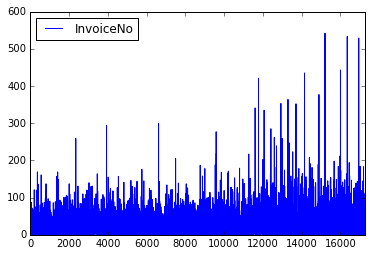

In [39]:
 df['InvoiceNo'].groupby(df['InvoiceDate']).size().reset_index().plot()

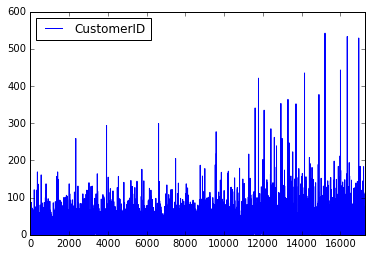

In [40]:
 df['CustomerID'].groupby(df['InvoiceDate']).size().reset_index().plot()

In [41]:
item_lookup = df[['StockCode', 'Description']].drop_duplicates() 
# Only get unique item/description pairs

In [42]:
item_lookup['StockCode'] = item_lookup.StockCode.astype(str) 
# Encode as strings for future lookup ease

In [43]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,dayOfWeek,hourOfDay,weekOfYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2,8,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2,8,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8,48


In [44]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Sales                 float64
dayOfWeek               int64
hourOfDay               int64
weekOfYear              int64
dtype: object

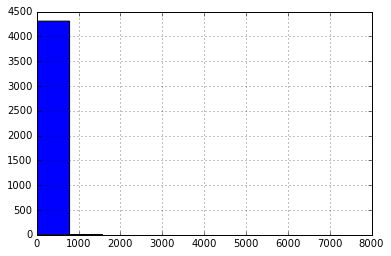

In [45]:
df['CustomerID'].value_counts().hist()

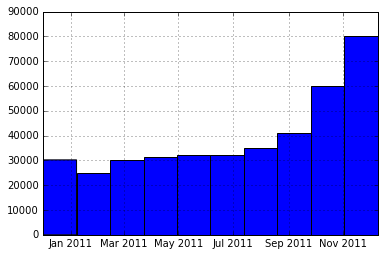

In [46]:
df['InvoiceDate'].hist()

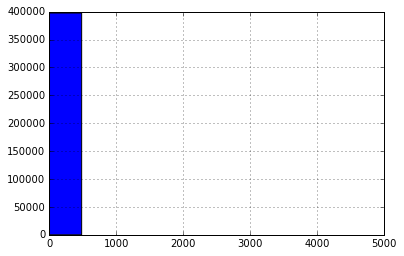

In [47]:
df['Quantity'].hist()

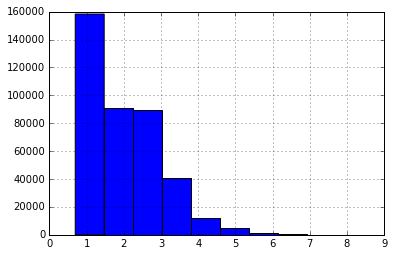

In [48]:
df['Quantity'].apply(np.log1p).hist()

In [49]:
df['logquant']=df['Quantity'].apply(np.log1p)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,dayOfWeek,hourOfDay,weekOfYear,logquant
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2,8,48,1.945910
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8,48,1.945910
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2,8,48,2.197225
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8,48,1.945910
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8,48,1.945910
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,2,8,48,1.098612
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,2,8,48,1.945910
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2,8,48,1.945910
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2,8,48,1.945910
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2,8,48,3.496508


In [50]:
df['mean_q']=df['logquant'].mean()
df['mean_q']

0         1.917668
1         1.917668
2         1.917668
3         1.917668
4         1.917668
5         1.917668
6         1.917668
7         1.917668
8         1.917668
9         1.917668
10        1.917668
11        1.917668
12        1.917668
13        1.917668
14        1.917668
15        1.917668
16        1.917668
17        1.917668
18        1.917668
19        1.917668
20        1.917668
21        1.917668
22        1.917668
23        1.917668
24        1.917668
25        1.917668
26        1.917668
27        1.917668
28        1.917668
29        1.917668
            ...   
541879    1.917668
541880    1.917668
541881    1.917668
541882    1.917668
541883    1.917668
541884    1.917668
541885    1.917668
541886    1.917668
541887    1.917668
541888    1.917668
541889    1.917668
541890    1.917668
541891    1.917668
541892    1.917668
541893    1.917668
541894    1.917668
541895    1.917668
541896    1.917668
541897    1.917668
541898    1.917668
541899    1.917668
541900    1.

In [51]:
df['std_q']=df['logquant'].std()
df['std_q']

0         1.002134
1         1.002134
2         1.002134
3         1.002134
4         1.002134
5         1.002134
6         1.002134
7         1.002134
8         1.002134
9         1.002134
10        1.002134
11        1.002134
12        1.002134
13        1.002134
14        1.002134
15        1.002134
16        1.002134
17        1.002134
18        1.002134
19        1.002134
20        1.002134
21        1.002134
22        1.002134
23        1.002134
24        1.002134
25        1.002134
26        1.002134
27        1.002134
28        1.002134
29        1.002134
            ...   
541879    1.002134
541880    1.002134
541881    1.002134
541882    1.002134
541883    1.002134
541884    1.002134
541885    1.002134
541886    1.002134
541887    1.002134
541888    1.002134
541889    1.002134
541890    1.002134
541891    1.002134
541892    1.002134
541893    1.002134
541894    1.002134
541895    1.002134
541896    1.002134
541897    1.002134
541898    1.002134
541899    1.002134
541900    1.

In [52]:
def apply_zscore(x):
    x['norm_quant']=(x['logquant']-x['mean_q'])/x['std_q']
    return x

df = df.groupby(['CustomerID','StockCode']).apply(lambda x: apply_zscore(x))

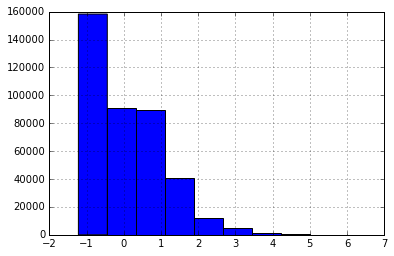

In [53]:
df['norm_quant'].hist()

In [54]:
df['norm_quant'].describe()

count    3.978820e+05
mean    -3.767850e-12
std      1.000000e+00
min     -1.221913e+00
25%     -8.173114e-01
50%      2.818201e-02
75%      6.459029e-01
max      6.544943e+00
Name: norm_quant, dtype: float64

In [55]:
df['Items']= df['StockCode'].astype(str)+' : '+df['Description'].astype(str)
df.drop(["StockCode", "Description"], axis=1, inplace=True)
df.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,dayOfWeek,hourOfDay,weekOfYear,logquant,mean_q,std_q,norm_quant,Items
0,536365,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2,8,48,1.945910,1.917668,1.002134,0.028182,85123A : WHITE HANGING HEART T-LIGHT HOLDER
1,536365,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8,48,1.945910,1.917668,1.002134,0.028182,71053 : WHITE METAL LANTERN
2,536365,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2,8,48,2.197225,1.917668,1.002134,0.278961,84406B : CREAM CUPID HEARTS COAT HANGER
3,536365,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8,48,1.945910,1.917668,1.002134,0.028182,84029G : KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8,48,1.945910,1.917668,1.002134,0.028182,84029E : RED WOOLLY HOTTIE WHITE HEART.


In [56]:
df = df[['CustomerID','Items','norm_quant']]
# Get rid of unnecessary info

df.head(5)

,CustomerID,Items,norm_quant
0,17850,85123A : WHITE HANGING HEART T-LIGHT HOLDER,0.028182
1,17850,71053 : WHITE METAL LANTERN,0.028182
2,17850,84406B : CREAM CUPID HEARTS COAT HANGER,0.278961
3,17850,84029G : KNITTED UNION FLAG HOT WATER BOTTLE,0.028182
4,17850,84029E : RED WOOLLY HOTTIE WHITE HEART.,0.028182


In [57]:
df['CustomerID']=df['CustomerID'].apply(lambda x:str(x))

In [58]:
df['Items']=df['Items'].apply(lambda x:str(x))

In [59]:
ratings_list = df[['norm_quant']]
users_list = df[['CustomerID']]
items_list = df[['Items']]

In [60]:
ratings= np.array(ratings_list)
users=np.array(users_list)
items=np.array(items_list)

In [61]:
ratings_df = pd.DataFrame(ratings_list, columns = [['ratings']])
items_df = pd.DataFrame(items_list, columns = [['Items']])
users_df = pd.DataFrame(users_list, columns = [['CustomerID']])

In [62]:
users_list.head()

,CustomerID
0,17850.0
1,17850.0
2,17850.0
3,17850.0
4,17850.0


In [63]:
items_df.head()

,Items
0,85123A : WHITE HANGING HEART T-LIGHT HOLDER
1,71053 : WHITE METAL LANTERN
2,84406B : CREAM CUPID HEARTS COAT HANGER
3,84029G : KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E : RED WOOLLY HOTTIE WHITE HEART.


In [64]:
ratings_df.head()

,ratings
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [65]:
num_customers = df.CustomerID.nunique() # Get our unique customers
num_items = df.Items.nunique() # Get our unique products that were purchased
quantity = df.norm_quant # All of our purchases

print('Customers: {} Items: {}'.format(num_customers, num_items))

Customers: 4337 Items: 3896


In [66]:
df

,CustomerID,Items,norm_quant
0,17850.0,85123A : WHITE HANGING HEART T-LIGHT HOLDER,0.028182
1,17850.0,71053 : WHITE METAL LANTERN,0.028182
2,17850.0,84406B : CREAM CUPID HEARTS COAT HANGER,0.278961
3,17850.0,84029G : KNITTED UNION FLAG HOT WATER BOTTLE,0.028182
4,17850.0,84029E : RED WOOLLY HOTTIE WHITE HEART.,0.028182
5,17850.0,22752 : SET 7 BABUSHKA NESTING BOXES,-0.817311
6,17850.0,21730 : GLASS STAR FROSTED T-LIGHT HOLDER,0.028182
7,17850.0,22633 : HAND WARMER UNION JACK,0.028182
8,17850.0,22632 : HAND WARMER RED POLKA DOT,0.028182
9,13047.0,84879 : ASSORTED COLOUR BIRD ORNAMENT,1.575477


In [67]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(-10, 10))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['CustomerID', 'Items', 'norm_quant']], reader)

# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(NormalPredictor(), data, cv=3)

{u'fit_time': (0.3560001850128174, 0.4660000801086426, 0.4550001621246338),
 u'test_mae': array([ 1.12556307,  1.12680167,  1.12776214]),
 u'test_rmse': array([ 1.41452211,  1.41513912,  1.41601536]),
 u'test_time': (0.7259998321533203, 0.9140000343322754, 0.9119999408721924)}

In [68]:
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

In [69]:
algo = SVD()

# Train and test reporting the RMSE and MAE scores
cross_validate(algo, data, measures=['RMSE', 'MAE'])

# Retrieve the trainset.
trainset = data.build_full_trainset()
algo.fit(trainset)

testset = trainset.build_testset()
predictions = algo.fit(trainset).test(testset)
# RMSE should be low as we are biased
accuracy.rmse(predictions, verbose=True)

RMSE: 0.4297


0.42971278874358154

In [70]:
algo1 = NMF()

# Train and test reporting the RMSE and MAE scores
cross_validate(algo1, data, measures=['RMSE', 'MAE'])

# Retrieve the trainset.
trainset = data.build_full_trainset()
algo1.fit(trainset)

testset = trainset.build_testset()
predictions = algo1.test(testset)
# RMSE should be low as we are biased
accuracy.rmse(predictions, verbose=True)

RMSE: 4.4016


4.4015685492694905

In [71]:
algo2 = SlopeOne()

# Train and test reporting the RMSE and MAE scores
cross_validate(algo2, data, measures=['RMSE', 'MAE'])

# Retrieve the trainset.
trainset = data.build_full_trainset()
algo2.fit(trainset)

testset = trainset.build_testset()
predictions = algo2.fit(trainset).test(testset)
# RMSE should be low as we are biased
accuracy.rmse(predictions, verbose=True)

RMSE: 0.5123


0.51225935903980369

In [72]:
algo3 = KNNBasic()
# Train and test reporting the RMSE and MAE scores
cross_validate(algo3, data, measures=['RMSE', 'MAE'])

# Retrieve the trainset.
trainset = data.build_full_trainset()
algo3.fit(trainset)

testset = trainset.build_testset()
predictions = algo3.fit(trainset).test(testset)
# RMSE should be low as we are biased
accuracy.rmse(predictions, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.4536


0.453569506937195

In [73]:
algo4 = KNNWithMeans()
# Train and test reporting the RMSE and MAE scores
cross_validate(algo4, data, measures=['RMSE', 'MAE'])

# Retrieve the trainset.
trainset = data.build_full_trainset()
algo4.fit(trainset)

testset = trainset.build_testset()
predictions = algo4.fit(trainset).test(testset)
# RMSE should be low as we are biased
accuracy.rmse(predictions, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.4695


0.46953476151804452

In [74]:
algo5 = KNNBaseline()
# Train and test reporting the RMSE and MAE scores
cross_validate(algo5, data, measures=['RMSE', 'MAE'])

# Retrieve the trainset.
trainset = data.build_full_trainset()
algo5.fit(trainset)

testset = trainset.build_testset()
predictions = algo5.fit(trainset).test(testset)
# RMSE should be low as we are biased
accuracy.rmse(predictions, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.4422


0.44222620262801277

In [75]:
algo6 = CoClustering()
# Train and test reporting the RMSE and MAE scores
cross_validate(algo6, data, measures=['RMSE', 'MAE'])

# Retrieve the trainset.
trainset = data.build_full_trainset()
algo6.fit(trainset)

testset = trainset.build_testset()
predictions = algo6.fit(trainset).test(testset)
# RMSE should be low as we are biased
accuracy.rmse(predictions, verbose=True)

RMSE: 0.7591


0.75911771753649127

In [76]:
algo7 = BaselineOnly()
# Train and test reporting the RMSE and MAE scores
cross_validate(algo7, data, measures=['RMSE', 'MAE'])

# Retrieve the trainset.
trainset = data.build_full_trainset()
algo7.fit(trainset)

testset = trainset.build_testset()
predictions = algo7.fit(trainset).test(testset)
# RMSE should be low as we are biased
accuracy.rmse(predictions, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
RMSE: 0.5560


0.5559721290103522

In [77]:
algo8 = NormalPredictor()
# Train and test reporting the RMSE and MAE scores
cross_validate(algo8, data, measures=['RMSE', 'MAE'])

# Retrieve the trainset.
trainset = data.build_full_trainset()
algo8.fit(trainset)

testset = trainset.build_testset()
predictions = algo8.fit(trainset).test(testset)
# RMSE should be low as we are biased
accuracy.rmse(predictions, verbose=True)

RMSE: 1.4145


1.4145097944363303